## Visión por Computadora 1 - Cohorte 17
## Trabajo Práctico 3
## Paola Cartala - Florentino Arias

## Parte 1: Detección del logo en cada imagen sin falsos positivos.
Vamos a utilizar cv2.matchTemplate() para implementar el método de template matching. Filtramos los resultados para evitar falsos positivos.

Tamaño del template: (175, 400)
Tipo de dato de template: uint8
Tamaño de la imagen: (1389, 1389)
Tipo de dato de la imagen: uint8
La similitud máxima fue de 0.29


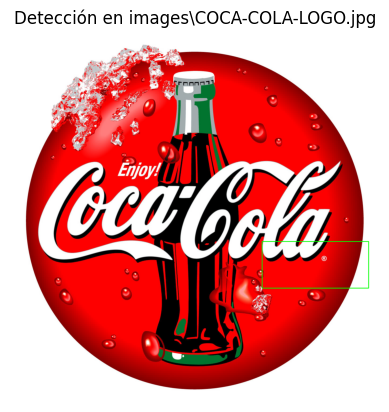

Tamaño de la imagen: (500, 207)
Tipo de dato de la imagen: uint8
El template fue redimensionado a: 206x90
La similitud máxima fue de 0.29


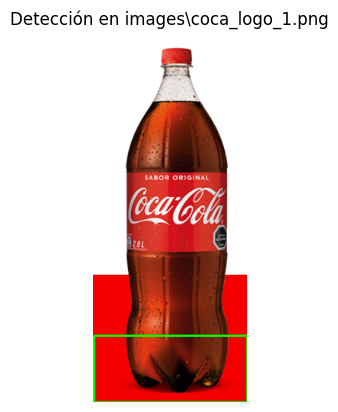

Tamaño de la imagen: (363, 233)
Tipo de dato de la imagen: uint8
El template fue redimensionado a: 233x101
La similitud máxima fue de 0.25


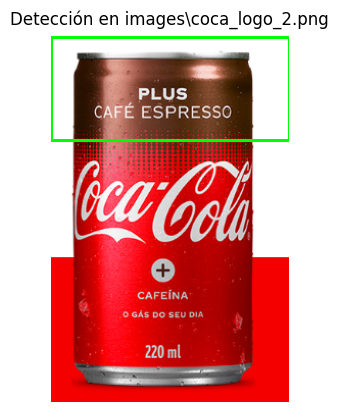

Tamaño de la imagen: (598, 799)
Tipo de dato de la imagen: uint8
La similitud máxima fue de 0.33


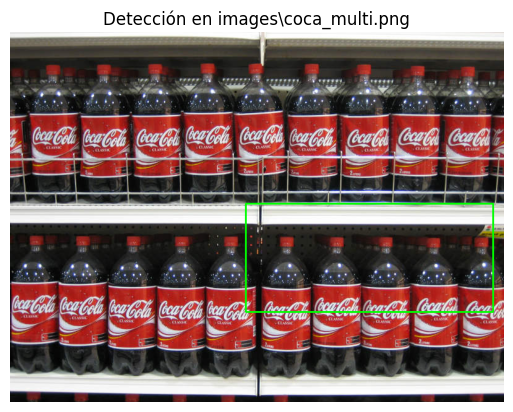

Tamaño de la imagen: (493, 715)
Tipo de dato de la imagen: uint8
La similitud máxima fue de 0.27


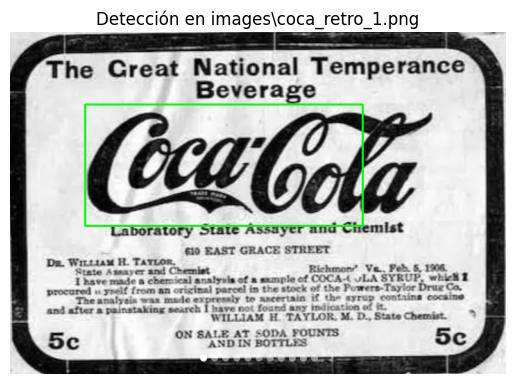

Tamaño de la imagen: (429, 715)
Tipo de dato de la imagen: uint8
La similitud máxima fue de 0.29


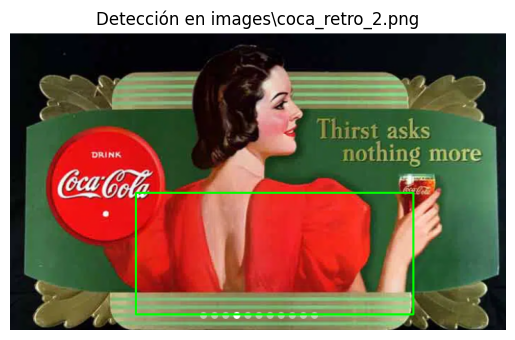

Tamaño de la imagen: (450, 687)
Tipo de dato de la imagen: uint8
La similitud máxima fue de 0.15


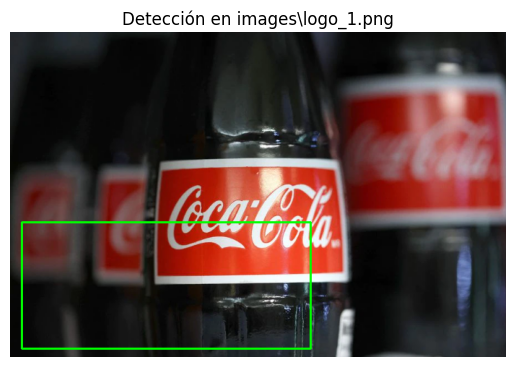

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import glob

# Los 6 métodos posibles para comparación, a modo de ayudamemoria solamente:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# Cargar el template
template = cv.imread('template/pattern.png', cv.IMREAD_GRAYSCALE)
template_h, template_w = template.shape # Dimensiones del template
print("Tamaño del template:", template.shape)
print("Tipo de dato de template:", template.dtype)

# Lista de todas las imágenes en la carpeta 'images'
all_images_paths = glob.glob('images/*.*')

# Lista de imágenes a procesar
# image_paths = ['images/image1.png', 'images/image2.png', 'images/image3.png']

for path in all_images_paths:
    # Leer la imagen
    image = cv.imread(path)
    rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    print("Tamaño de la imagen:", gray_image.shape)
    print("Tipo de dato de la imagen:", gray_image.dtype)

    # Ajustar el tamaño del template si es más grande que la imagen
    gray_h, gray_w = gray_image.shape
    template_h, template_w = template.shape

    scaled_template = template.copy()
    if template_h > gray_h or template_w > gray_w:
        # Calcular la relación de escalado necesaria para que el template quepa dentro de la imagen
        scale_factor_h = gray_h / template_h
        scale_factor_w = gray_w / template_w
        scale_factor = min(scale_factor_h, scale_factor_w)

        # Escalar el template
        new_template_w = int(template_w * scale_factor)
        new_template_h = int(template_h * scale_factor)
        template_h, template_w = new_template_h, new_template_w

        scaled_template = cv.resize(scaled_template, (new_template_w, new_template_h), interpolation=cv.INTER_AREA)
        print(f"El template fue redimensionado a: {new_template_w}x{new_template_h}")
    
    # Aplicar template matching
    # Método de comparación a utilizar. Utilizamos correlación normalizada (TM_CCOEFF_NORMED) para medir la similitud.
    result = cv.matchTemplate(gray_image, scaled_template, cv.TM_CCOEFF_NORMED)
    # Encontramos los valores máximos y mínimos
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
    
    # Marcamos el lugar donde lo haya encontrado
    #----------------------------------------
    bottom_right = (max_loc[0] + template_w, max_loc[1] + template_h)
    cv.rectangle(image, max_loc, bottom_right, (0, 255, 0), 2)
    print(f"La similitud máxima fue de {max_val:.2f}")
    #threshold = 0.8  # Ajustar el umbral para evitar falsos positivos
    #locations = np.where(result >= threshold)
    
    # Dibujar los bounding boxes para cada coincidencia
    #for pt in zip(*locations[::-1]):
    #for pt in zip(*result[::-1]):
    #    cv.rectangle(image, pt, (pt[0] + template_w, pt[1] + template_h), (0, 255, 0), 2)
    #    confidence = result[pt[1], pt[0]]
    #    cv.putText(image, f'{confidence:.2f}', (pt[0], pt[1] - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    
    # Mostrar el resultado
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(f'Detección en {path}')
    plt.axis('off')
    plt.show()

    # Resultado de coincidencia
    #plt.subplot(121),plt.imshow(result,cmap = 'gray')
    #plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    # Imagen original con recuadros
    #plt.subplot(122),plt.imshow(image)
    #plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    #plt.show()


## Parte 2: Algoritmo para múltiples detecciones en 'coca_multi.png'
Para múltiples instancias del logotipo en la imagen coca_multi.png tenemos que ajustar la lógica para permitir múltiples detecciones.

Se dibujan todos los bounding boxes que cumplen con el umbral definido (threshold).

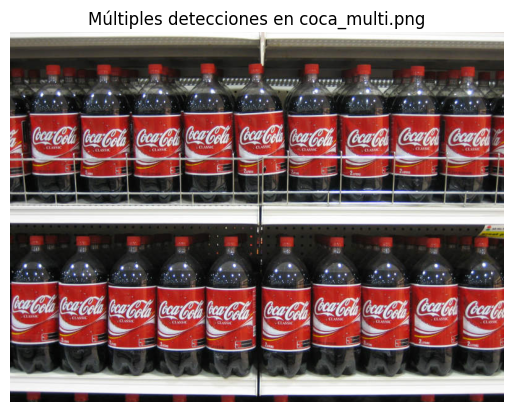

In [17]:
# Cargar la imagen coca_multi.png
multi_image_path = 'images/coca_multi.png'
multi_image = cv.imread(multi_image_path)
gray_multi_image = cv.cvtColor(multi_image, cv.COLOR_BGR2GRAY)

# Aplicar template matching
result_multi = cv.matchTemplate(gray_multi_image, template, cv.TM_CCOEFF_NORMED)
threshold_multi = 0.8
locations_multi = np.where(result_multi >= threshold_multi)

w, h = template.shape[::-1]
# Dibujar bounding boxes para cada coincidencia
for pt in zip(*locations_multi[::-1]):
    cv.rectangle(multi_image, pt, (pt[0] + template_w, pt[1] + template_h), (0, 255, 0), 2)
    confidence = result_multi[pt[1], pt[0]]
    cv.putText(multi_image, f'{confidence:.2f}', (pt[0], pt[1] - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Mostrar el resultado
plt.imshow(cv.cvtColor(multi_image, cv.COLOR_BGR2RGB))
plt.title('Múltiples detecciones en coca_multi.png')
plt.axis('off')
plt.show()

## Parte 3: Generalización del algoritmo para todas las imágenes.
Vamos a generalizar el algoritmo para todas las imágenes de la carpeta y usaremos el método de supresión de no máximos (NMS) para evitar solapamientos innecesarios en las detecciones.

Usamos glob para iterar sobre todas las imágenes en la carpeta 'images'.

Implementamos la función non_max_suppression() para evitar múltiples detecciones del mismo logo muy cercanas entre sí.

Dibujamos los bounding boxes solo para las detecciones que quedan después de aplicar NMS.

In [18]:
import glob

# Función para aplicar NMS
def non_max_suppression(boxes, scores, threshold=0.5):
    if len(boxes) == 0:
        return []

    boxes = np.array(boxes)
    scores = np.array(scores)

    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    areas = (x2 - x1 + 1) * (y2 - y1 + 1)
    order = scores.argsort()[::-1]

    keep = []
    while order.size > 0:
        i = order[0]
        keep.append(i)

        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        overlap = (w * h) / areas[order[1:]]

        order = order[np.where(overlap <= threshold)[0] + 1]

    return keep

# Generalizar para todas las imágenes
all_images_paths = glob.glob('images/*.png')

for path in all_images_paths:
    # Leer la imagen
    image = cv.imread(path)
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Aplicar template matching
    result = cv.matchTemplate(gray_image, template, cv.TM_CCOEFF_NORMED)
    threshold = 0.8
    locations = np.where(result >= threshold)

    # Guardar las coordenadas de las detecciones y sus puntuaciones
    boxes = []
    scores = []

    for pt in zip(*locations[::-1]):
        x1, y1 = pt
        x2, y2 = x1 + template_w, y1 + template_h
        confidence = result[pt[1], pt[0]]
        boxes.append([x1, y1, x2, y2])
        scores.append(confidence)

    # Aplicar NMS para eliminar solapamientos
    keep_indices = non_max_suppression(boxes, scores, threshold=0.5)

    # Dibujar los bounding boxes finales
    for idx in keep_indices:
        x1, y1, x2, y2 = boxes[idx]
        confidence = scores[idx]
        cv.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv.putText(image, f'{confidence:.2f}', (x1, y1 - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    # Mostrar el resultado
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(f'Detección generalizada en {path}')
    plt.axis('off')
    plt.show()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\templmatch.cpp:1175: error: (-215:Assertion failed) _img.size().height <= _templ.size().height && _img.size().width <= _templ.size().width in function 'cv::matchTemplate'


## Parte 4: Puntos extra. Aplicar unsharp masking para expandir la zona de enfoque y devolver.
Vamos a aplicar unsharp masking para mejorar la nitidez de las imágenes y expandir la zona de enfoque. Esto resalta los detalles al aumentar el contraste de los bordes haciendo así que el logotipo sea más visible antes de la detección.

In [ ]:
def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.5, threshold=0):
    # Aplicar suavizado Gaussian a la imagen
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)

    # Calcular la máscara
    mask = cv2.addWeighted(image, 1 + amount, blurred, -amount, 0)

    # Aplicar umbral para mejorar detalles
    if threshold > 0:
        low_contrast_mask = np.abs(image - blurred) < threshold
        np.copyto(mask, image, where=low_contrast_mask)

    return mask

# Lista de imágenes a procesar
all_images_paths = glob.glob('images/*.png')

# Cargar el template
template = cv2.imread('template.png', cv2.IMREAD_GRAYSCALE)
template_h, template_w = template.shape

for path in all_images_paths:
    # Leer la imagen
    image = cv2.imread(path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar Unsharp Masking
    sharpened_image = unsharp_mask(gray_image, kernel_size=(5, 5), sigma=1.0, amount=1.5, threshold=10)

    # Aplicar template matching sobre la imagen mejorada
    result = cv2.matchTemplate(sharpened_image, template, cv2.TM_CCOEFF_NORMED)
    threshold = 0.8
    locations = np.where(result >= threshold)

    # Dibujar los bounding boxes para cada coincidencia
    for pt in zip(*locations[::-1]):
        cv2.rectangle(image, pt, (pt[0] + template_w, pt[1] + template_h), (0, 255, 0), 2)
        confidence = result[pt[1], pt[0]]
        cv2.putText(image, f'{confidence:.2f}', (pt[0], pt[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    # Mostrar el resultado
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Detección con Unsharp Masking en {path}')
    plt.axis('off')
    plt.show()


Lo que hicimos fue aplicar unsharp_mask a la imagen en escala de grises para resaltar los bordes y después realizamos template matching con la imagen mejorada para detectar el logotipo.